In [18]:
import meep as mp
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

n = 1.4440
w = 2
r = 1
pad = 4
dpml = 2

cell_size = mp.Vector3(100,15,0)

pml_layers = [mp.PML(thickness=1)]

nonpml_vol = mp.Volume(mp.Vector3(), size=mp.Vector3(sxy-2*dpml,sxy-2*dpml))

Clad = mp.Cylinder(height=mp.inf,
                   radius=62.5, 
                   material=mp.Medium(index=1.44399),
                   axis=mp.Vector3(x=1,y=0,z=0) )

Core = mp.Cylinder(height=mp.inf,
                   radius=4.1, 
                   material=mp.Medium(index=1.44813),
                   axis=mp.Vector3(x=1,y=0,z=0) )

geometry = [Clad,Core]

fcen = 1/1.55
df = 16e-3
kpoint = mp.Vector3(mp.X)
bnum = 1    # band number of eigenmode


src = [mp.EigenModeSource(src=mp.GaussianSource(fcen,fwidth=df),
                              center=mp.Vector3(x=-45,y=0,z=0),
                              size=mp.Vector3(y=12),
                              direction=mp.X,
                              eig_kpoint=kpoint,
                              eig_band=bnum,
                              eig_parity=mp.NO_PARITY,
                              eig_match_freq=True)]

symmetries = [mp.Mirror(mp.Y,phase=+1)]

sim = mp.Simulation(cell_size=cell_size,
                    geometry=geometry,
                    sources=src,
                    resolution=5,
                    force_complex_fields=True,
                    #symmetries=symmetries,
                    boundary_layers=pml_layers,
                    #k_point=mp.Vector3(mp.X)
                   )


flux = sim.add_flux(fcen,0,1,mp.FluxRegion(center=mp.Vector3(x=45),size=mp.Vector3(y=12)))



-----------
Initializing structure...
time for choose_chunkdivision = 0.000285149 s
Working in 2D dimensions.
Computational cell is 100 x 15 x 0 with resolution 5
     cylinder, center = (0,0,0)
          radius 62.5, height 1e+20, axis (1, 0, 0)
          dielectric constant epsilon diagonal = (2.08511,2.08511,2.08511)
     cylinder, center = (0,0,0)
          radius 4.1, height 1e+20, axis (1, 0, 0)
          dielectric constant epsilon diagonal = (2.09708,2.09708,2.09708)
time for set_epsilon = 0.124705 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0.934277,0,0) = 0.645576 after 120 iters
MPB solved for frequency_1(0.933676,0,0) = 0.645161 after 12 iters
MPB solved for frequency_1(0.933676,0,0) = 0.645161 after 1 iters


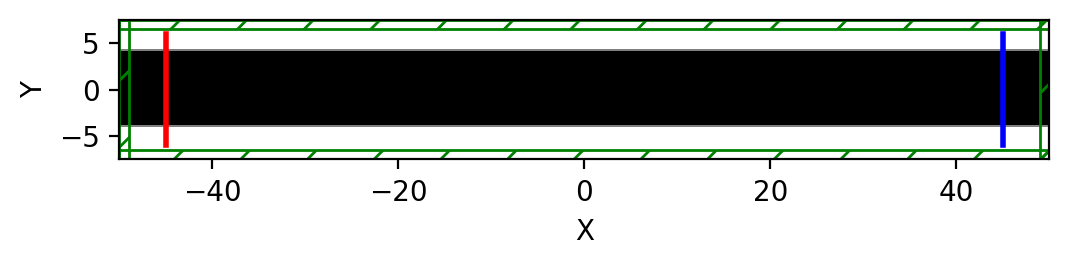

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=200)
sim.plot2D(plot_sources_flag=True,plot_monitors_flag=True,eps_parameters={'interpolation':'none'})
plt.show()

In [20]:
t = (1e-6/3e8)
tFactor = 1e-15/t # converts femptoseconds into unitless MEEP 

Simtime = 500 #in femptoseconds

sim.use_output_directory('test/potato')

#sim.reset_meep()
sim.run(until=(Simtime*tFactor))

Meep: using output directory 'test/potato'


FloatProgress(value=0.0, description='0% done ', max=150.00000000000003)

run 0 finished at t = 150.1 (1501 timesteps)


In [23]:
res2 = sim.get_eigenmode_coefficients(flux,[1],eig_parity=mp.ODD_Z+mp.EVEN_Y)
taper_coeffs = res2.alpha
taper_flux = mp.get_fluxes(flux)

R_coeffs.append(abs(taper_coeffs[0,0,1])**2/abs(incident_coeffs[0,0,0])**2)
R_flux.append(-taper_flux[0]/incident_flux[0])
print("refl:, {}, {:.8f}, {:.8f}".format(Lt,R_coeffs[-1],R_flux[-1]))

MPB solved for frequency_1(0.934277,0,0) = 0.645576 after 49 iters
MPB solved for frequency_1(0.933676,0,0) = 0.645161 after 12 iters
MPB solved for frequency_1(0.933676,0,0) = 0.645161 after 1 iters
Dominant planewave for band 1: (0.933676,-0.000000,0.000000)


NameError: name 'R_coeffs' is not defined

In [22]:
mp.get_eigenmode_freqs(flux)

[0.6451612903225806]